In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

In [2]:
heart_attack = pd.read_csv('heart_attack_indonesia.csv')

In [3]:
heart_attack.head()

,ID,State,Age,HeartAttack,Gender,Cholesterol,SmokingHabits,PhysicalActivity,BMI,Hypertension,...,EducationLevel,MaritalStatus,FamilyHistoryHeartDisease,IncomeLevel,HealthcareAccess,SleepHours,UrbanOrRural,AirQualityIndex,PollutionLevel,EmploymentStatus
0,1,Pekanbaru,32,No,Male,179,Smoker,High,19.1,Yes,...,Secondary,Single,No,Middle,Good,7.9,Urban,73,High,Unemployed
1,2,Makassar,15,Yes,Female,201,Non-smoker,High,26.9,No,...,Secondary,Married,No,Middle,Average,8.5,Urban,266,Moderate,Unemployed
2,3,Surabaya,41,No,Female,167,Non-smoker,Moderate,29.6,Yes,...,Primary,Single,No,Middle,Poor,7.3,Urban,132,Moderate,Employed
3,4,Malang,31,No,Male,287,Smoker,Moderate,19.4,No,...,Higher,Single,Yes,Middle,Good,4.8,Rural,64,High,Unemployed
4,5,Bali,19,No,Male,239,Smoker,High,18.5,No,...,Secondary,Married,No,Low,Poor,6.0,Urban,155,Moderate,Unemployed


In [4]:
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170501 entries, 0 to 170500
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         170501 non-null  int64  
 1   State                      170501 non-null  object 
 2   Age                        170501 non-null  int64  
 3   HeartAttack                170501 non-null  object 
 4   Gender                     170501 non-null  object 
 5   Cholesterol                170501 non-null  int64  
 6   SmokingHabits              170501 non-null  object 
 7   PhysicalActivity           170501 non-null  object 
 8   BMI                        170501 non-null  float64
 9   Hypertension               170501 non-null  object 
 10  Diabetes                   170501 non-null  object 
 11  AlcoholConsumption         113873 non-null  object 
 12  DietType                   170501 non-null  object 
 13  OccupationType             17

# Deskripsi Setiap Fitur

#### State : Wilayah responden saat ini tinggali <br>
#### Age : Umur responden <br>
#### HeartAttack : Fitur yang berisi indikator apakah responden tersebut memiliki penyakit serangan jantung <br>
#### Gender : Fitur ini berisi jenis kelamin dari responden <br>
#### Cholesterol : Fitur berikut adalah untuk mengetahui seberapa besar kolesterol yang dimiliki responden <br>
#### SmokingHabits : Fitur ini menyatakan apakah responden memiliki kebiasaan untuk merokok atau tidak <br>
#### PhysicalActivity : Fitur berikut menyatakan apakah responden memiliki aktivitas fisik yang berat atau ringan <br>
#### BMI (Body Mass Index) : Fitur berikut adalah ukuran yang digunakan untuk menentukan apakah berat badan seseorang proporsional dengan tinggi badan <br>
#### Hypertension : Fitur berikut menyatakan apakah responden memiliki riwayat penyakit hipertensi <br>
#### Diabetes : Fitur berikut menyatakan apakah responden memiliki riwayat penyakit diabetes <br>
#### AlcoholConsumption : Fitur berikut menyatakan apakah responden memiliki kebiasaan untuk mengonsumsi alkohol <br>
#### DietType : Fitur berikut menyatakan apakah diet seseorang ke arah yang baik atau tidak <br>
#### OccupationType : Fitur berikut dapat diartikan sebagai apakah seorang responden bekerja secara aktif (fisik) atau sedentary (non-fisik) <br>
#### StressLevel : Fitur ini mengukur level stress yang dimiliki oleh responden <br>
#### EducationLevel : Fitur ini melihat apakah level edukasi yang didapat dari responden sejauh mana, apakah hanya tingkat sekolah dasar atau sampai jenjang tinggi <br>
#### MaritalStatus : Fitur ini menyatakan apakah responden sudah menikah atau belum <br>
#### FamilyHistoryDisease : Fitur ini melihat apakah responden memiliki riwayat penyakit yang diturunkan <br>
#### IncomeLevel : Fitur ini menyatakan seberapa besar income yang didapatkan oleh responden <br>
#### HealthCaseAccess : Fitur ini menandakan seberapa besar akses kesehatan yang bisa didapat oleh responden <br>
#### SleepHours : Fitur ini menyatakan jam tidur dari responden<br>
#### UrbanOrRural : Fitur ini menyatakan klasifikasi responden apakah berada di perkotaan atau di pedesaan <br>
#### AirQualityIndex : Fitur ini menyatakan kualitas udara apakah tergolong baik atau buruk <br>
#### PollutionLevel : Fitur ini menyatakan level polusi yang terdapat pada daerah responden <br>
#### EmploymentStatus : Fitur ini menyatakan apakah responden tersebut sudah bekerja atau belum bekerja <br>

In [5]:
heart_attack.describe()

,ID,Age,Cholesterol,BMI,SleepHours,AirQualityIndex
count,170501.000000,170501.000000,170501.000000,170501.000000,170501.000000,170501.000000
mean,85251.000000,39.510132,224.525035,26.511188,6.503479,174.802541
std,49219.543461,14.416183,43.230770,4.902923,1.442710,72.150478
min,1.000000,15.000000,150.000000,18.000000,4.000000,50.000000
25%,42626.000000,27.000000,187.000000,22.300000,5.300000,112.000000
50%,85251.000000,40.000000,225.000000,26.500000,6.500000,175.000000
75%,127876.000000,52.000000,262.000000,30.800000,7.800000,237.000000
max,170501.000000,64.000000,299.000000,35.000000,9.000000,299.000000


In [6]:
heart_attack.isnull().sum()

ID                               0
State                            0
Age                              0
HeartAttack                      0
Gender                           0
Cholesterol                      0
SmokingHabits                    0
PhysicalActivity                 0
BMI                              0
Hypertension                     0
Diabetes                         0
AlcoholConsumption           56628
DietType                         0
OccupationType                   0
StressLevel                      0
EducationLevel                   0
MaritalStatus                    0
FamilyHistoryHeartDisease        0
IncomeLevel                      0
HealthcareAccess                 0
SleepHours                       0
UrbanOrRural                     0
AirQualityIndex                  0
PollutionLevel                   0
EmploymentStatus                 0
dtype: int64

In [7]:
heart_attack['AlcoholConsumption'].fillna("Never", inplace = True)

C:\Users\mfatu\AppData\Local\Temp\ipykernel_6624\2298920491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_attack['AlcoholConsumption'].fillna("Never", inplace = True)


In [8]:
heart_attack.isnull().sum()

ID                           0
State                        0
Age                          0
HeartAttack                  0
Gender                       0
Cholesterol                  0
SmokingHabits                0
PhysicalActivity             0
BMI                          0
Hypertension                 0
Diabetes                     0
AlcoholConsumption           0
DietType                     0
OccupationType               0
StressLevel                  0
EducationLevel               0
MaritalStatus                0
FamilyHistoryHeartDisease    0
IncomeLevel                  0
HealthcareAccess             0
SleepHours                   0
UrbanOrRural                 0
AirQualityIndex              0
PollutionLevel               0
EmploymentStatus             0
dtype: int64

In [9]:
heart_attack['AlcoholConsumption']

0          Never
1         Rarely
2          Never
3         Rarely
4          Never
           ...  
170496    Rarely
170497     Often
170498     Never
170499    Rarely
170500     Never
Name: AlcoholConsumption, Length: 170501, dtype: object

In [10]:
heart_attack['State'].unique()

array(['Pekanbaru', 'Makassar', 'Surabaya', 'Malang', 'Bali', 'Bandung',
       'Denpasar', 'Batam', 'Yogyakarta', 'Jakarta', 'Semarang',
       'Palembang', 'Balikpapan', 'Pontianak', 'Medan'], dtype=object)

#### Responden berikut dilakukan pada kota-kota
1. Pekanbaru
2. Makassar
3. Surabaya
4. Malang
5. Bali
6. Bandung
7. Denpasar
8. Batam
9. Yogyakarta
10. Jakarta
11. Semarang
12. Palembang
13. Balikpapan
14. Pontianak
15. Medan

In [11]:
numeric_data = heart_attack.select_dtypes(include=[np.number])
numeric_data.head()

,ID,Age,Cholesterol,BMI,SleepHours,AirQualityIndex
0,1,32,179,19.1,7.9,73
1,2,15,201,26.9,8.5,266
2,3,41,167,29.6,7.3,132
3,4,31,287,19.4,4.8,64
4,5,19,239,18.5,6.0,155


In [12]:
categorical_data = heart_attack.select_dtypes(exclude=[np.number])
categorical_data.head()

,State,HeartAttack,Gender,SmokingHabits,PhysicalActivity,Hypertension,Diabetes,AlcoholConsumption,DietType,OccupationType,StressLevel,EducationLevel,MaritalStatus,FamilyHistoryHeartDisease,IncomeLevel,HealthcareAccess,UrbanOrRural,PollutionLevel,EmploymentStatus
0,Pekanbaru,No,Male,Smoker,High,Yes,No,Never,Unhealthy,Active,Moderate,Secondary,Single,No,Middle,Good,Urban,High,Unemployed
1,Makassar,Yes,Female,Non-smoker,High,No,Yes,Rarely,Balanced,Sedentary,Moderate,Secondary,Married,No,Middle,Average,Urban,Moderate,Unemployed
2,Surabaya,No,Female,Non-smoker,Moderate,Yes,No,Never,Balanced,Active,Low,Primary,Single,No,Middle,Poor,Urban,Moderate,Employed
3,Malang,No,Male,Smoker,Moderate,No,No,Rarely,Unhealthy,Sedentary,Low,Higher,Single,Yes,Middle,Good,Rural,High,Unemployed
4,Bali,No,Male,Smoker,High,No,No,Never,Balanced,Active,Low,Secondary,Married,No,Low,Poor,Urban,Moderate,Unemployed


In [13]:
heart_attack_by_age = heart_attack.groupby(['Age', 'HeartAttack']).size().unstack()

heart_attack_by_age

HeartAttack,No,Yes
Age,,
15,2572,819
16,2535,823
17,2561,869
18,2524,864
19,2525,894
20,2664,863
21,2557,840
22,2460,804
23,2563,856


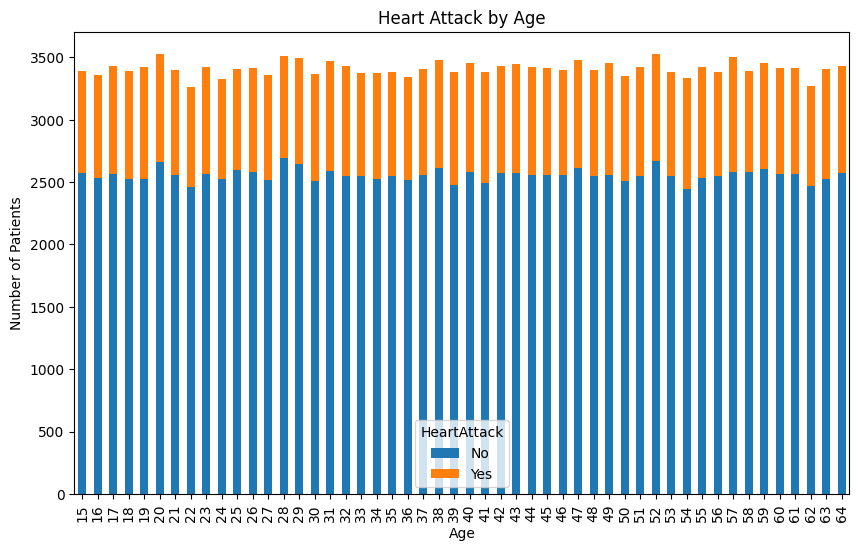

In [14]:
heart_attack_by_age.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Heart Attack by Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()


#### Jika dilihat pada grafik tersebut, sangat mudah terlihat bahwa umur tidak mempengaruhi serangan jantung

In [15]:
numeric_data.insert(2, 'HeartAttack', heart_attack['HeartAttack'])

In [16]:
numeric_data.head()

,ID,Age,HeartAttack,Cholesterol,BMI,SleepHours,AirQualityIndex
0,1,32,No,179,19.1,7.9,73
1,2,15,Yes,201,26.9,8.5,266
2,3,41,No,167,29.6,7.3,132
3,4,31,No,287,19.4,4.8,64
4,5,19,No,239,18.5,6.0,155


In [17]:
heart_attack_model = heart_attack_model.drop('HeartAttack', axis=1)

NameError: name 'heart_attack_model' is not defined

In [18]:
heart_attack_model = numeric_data
heart_attack_model['HeartAttack'] = heart_attack_model['HeartAttack'].map({'Yes': 1, 'No': 0})

In [82]:
heart_attack_model.head(100)

,ID,Age,HeartAttack,Cholesterol,BMI,SleepHours,AirQualityIndex
0,1,32,0,179,19.1,7.9,73
1,2,15,1,201,26.9,8.5,266
2,3,41,0,167,29.6,7.3,132
3,4,31,0,287,19.4,4.8,64
4,5,19,0,239,18.5,6.0,155
...,...,...,...,...,...,...,...
95,96,36,0,155,20.3,8.4,243
96,97,25,0,262,31.5,4.7,64
97,98,52,1,169,18.8,5.7,83
98,99,38,0,225,29.2,7.5,59


In [86]:
X = heart_attack_model[['Age', 'Cholesterol', 'BMI', 'SleepHours', 'AirQualityIndex']]  # dependent variable
y = heart_attack_model['HeartAttack']  # Independent variable

In [88]:
print(y.value_counts())

HeartAttack
0    127826
1     42675
Name: count, dtype: int64


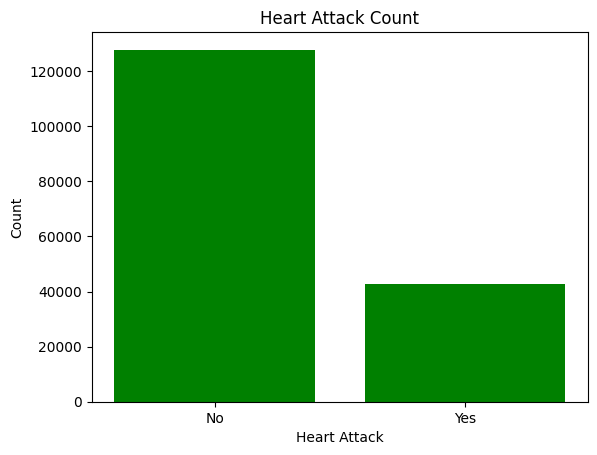

In [91]:
plt.bar(y.value_counts().index, y.value_counts().values, color='green')
plt.xlabel('Heart Attack')
plt.ylabel('Count')
plt.title('Heart Attack Count')
plt.xticks(y.value_counts().index, ['No', 'Yes'])
plt.show()

In [116]:
# Resampling data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


print("Distribusi setelah resampling:")
print(pd.Series(y_resampled).value_counts())

X_resampled.head()
y_resampled.head()

Distribusi setelah resampling:
HeartAttack
0    127826
1    127826
Name: count, dtype: int64


0    0
1    1
2    0
3    0
4    0
Name: HeartAttack, dtype: int64

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)

In [121]:
print("Distribusi y_train sebelum resampling:")
print(y_train.value_counts())

print("Distribusi y_test sebelum resampling:")
print(y_test.value_counts())

print("Distribusi x_train sebelum resampling:")
print(X_train.value_counts())

print("Distribusi x_test sebelum resampling:")
print(X_test.value_counts())

Distribusi y_train sebelum resampling:
HeartAttack
1    89595
0    89361
Name: count, dtype: int64
Distribusi y_test sebelum resampling:
HeartAttack
0    38465
1    38231
Name: count, dtype: int64
Distribusi x_train sebelum resampling:
Age  Cholesterol  BMI        SleepHours  AirQualityIndex
24   183          33.400000  8.900000    258                3
29   281          24.900000  7.300000    154                2
44   155          18.800000  4.800000    103                2
     182          20.900000  8.700000    51                 2
55   263          33.400000  6.200000    261                2
                                                           ..
15   150          29.391999  7.211846    121                1
                  29.600000  6.400000    263                1
                  29.700000  7.200000    121                1
                  30.800000  7.300000    287                1
                  24.300000  7.000000    149                1
Name: count, Length: 1789

In [122]:
# Logistic regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

In [123]:
model.intercept_

array([0.06116333])

In [124]:
probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (HeartAttack = 1)
print(probs[:10])  # Print the first 10 probabilities

[0.49533856 0.50156516 0.50232347 0.49827651 0.50117921 0.50424775
 0.50101875 0.4990501  0.50758582 0.4978033 ]


In [125]:
threshold = 0.5
custom_predictions = (probs >= threshold).astype(int)

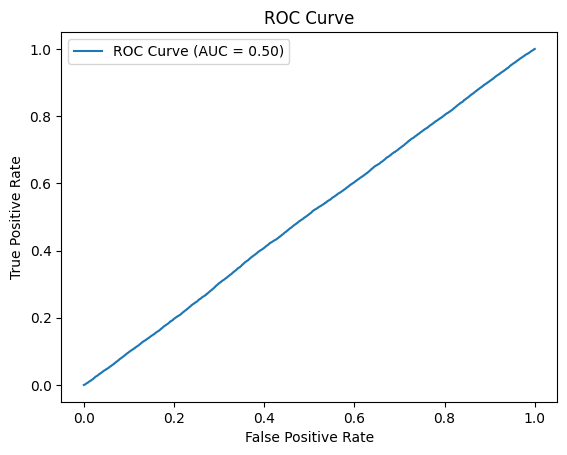

In [126]:
fpr, tpr, _ = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [127]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[17243 21222]
 [16910 21321]]


In [128]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


In [154]:
new_data_high_risk = pd.DataFrame({
    "Age": [40],                 # Usia lanjut
    "Cholesterol": [200],        # Kolesterol sangat tinggi
    "BMI": [30.0],               # Obesitas ekstrem
    "SleepHours": [8],           # Sangat kurang tidur
    "AirQualityIndex": [400]     # Kualitas udara sangat buruk (maksimum AQI)
})

high_risk_prediction = model.predict(new_data_high_risk)
high_risk_probability = model.predict_proba(new_data_high_risk)[:, 1]

print(f"Prediction (High Risk): {high_risk_prediction[0]}")
print(f"Probability of Heart Attack (High Risk): {high_risk_probability[0]:.4f}")

Prediction (High Risk): 0
Probability of Heart Attack (High Risk): 0.4895
